In [1]:
from datasets import load_dataset

ds = load_dataset('uoft-cs/cifar10')

In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

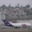

0



In [3]:
display(ds['train']['img'][0])
print(ds['train']['label'][0])

print()

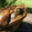

6



In [4]:
display(ds['train']['img'][1])
print(ds['train']['label'][0])

print()
print(ds['train']['label'][1])

print()

In [53]:
import numpy as np
from PIL.PngImagePlugin import PngImageFile
from PIL.Image import Image, fromarray
import torch


def build_tensor(img: PngImageFile) -> torch.Tensor:
    h = torch.Tensor(np.array(img.getchannel('R')))
    s = torch.Tensor(np.array(img.getchannel('G')))
    v = torch.Tensor(np.array(img.getchannel('B')))

    sample_feature = torch.stack([h, s, v], dim=0)
    assert sample_feature.shape == (3, 32, 32)

    return sample_feature


def augment_feature(features: torch.Tensor) -> torch.Tensor:
    (num_samples, num_channels, sz_x, sz_y) = features.shape
    padding = 4
    features_padded = torch.nn.functional.pad(
        features, (padding,) * 4, mode='constant'
    )

    sample_ixs = torch.arange(num_samples).view(-1, 1, 1, 1)
    # (num_samples, 1, 1, 1)
    channel_ixs = torch.arange(num_channels).view(1, -1, 1, 1)
    # (1, num_channels, 1, 1)

    x = torch.randint(0, 2 * padding, (num_samples, 1, 1, 1))
    # (num_samples, 1, 1, 1)

    y = torch.randint(0, 2 * padding, (num_samples, 1, 1, 1))
    # (num_samples, 1, 1, 1)

    x_orig = torch.arange(sz_x).view(1, 1, 1, -1)
    # (1, 1, 1, sz_x)

    y_orig = torch.arange(sz_y).view(1, 1, -1, 1)
    # (1, 1, sz_y, 1)

    x_shifted = x_orig + x
    # (num_samples, 1, 1, sz_x)

    y_shifted = y_orig + y
    # (num_samples, 1, sz_y, 1)

    features_cropped = features_padded[
        sample_ixs, channel_ixs, y_shifted, x_shifted
    ]
    # (num_samples, num_channels, sz_y, sz_x)

    flip_mask = torch.bernoulli(torch.full((num_samples,), 0.5)).bool()
    features_cropped[flip_mask] = torch.flip(
        features_cropped[flip_mask], dims=(3,)
    )

    return features_cropped

In [54]:
images = [ds['train']['img'][ix] for ix in (0, 1)]

batch_tensor = torch.cat([build_tensor(img).unsqueeze(0) for img in images])
print(batch_tensor[0].shape)

torch.Size([3, 32, 32])


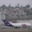

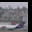

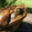

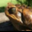

In [56]:
batch_augmented = augment_feature(batch_tensor)

for ix in (0, 1):
    img = fromarray(
        np.moveaxis(
            batch_augmented[ix].numpy().astype(np.uint8), (0, 1, 2), (2, 0, 1)
        ),
        mode='RGB',
    )
    display(images[ix])
    display(img)

In [ ]:
# https://huggingface.co/datasets/uoft-cs/cifar10
label_to_text = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

In [5]:
img = ds['train']['img'][0]

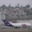

In [6]:
img

In [7]:
img_hsv = img.convert('HSV')

In [8]:
import numpy as np

img_arr = np.array(img_hsv)
print(img_arr.shape)
print(img_arr.dtype)

(32, 32, 3)
uint8


In [11]:
import torch

torch.Tensor(np.array(img_hsv.getchannel('H')))

tensor([[176., 176., 176.,  ..., 177., 177., 177.],
        [176., 176., 176.,  ..., 177., 177., 177.],
        [176., 176., 176.,  ..., 177., 177., 177.],
        ...,
        [  0.,   8.,   0.,  ...,  21.,   8.,   0.],
        [  3.,   4.,   0.,  ...,   9.,   7.,   3.],
        [ 15.,  12.,   4.,  ...,  14.,  19.,  21.]])

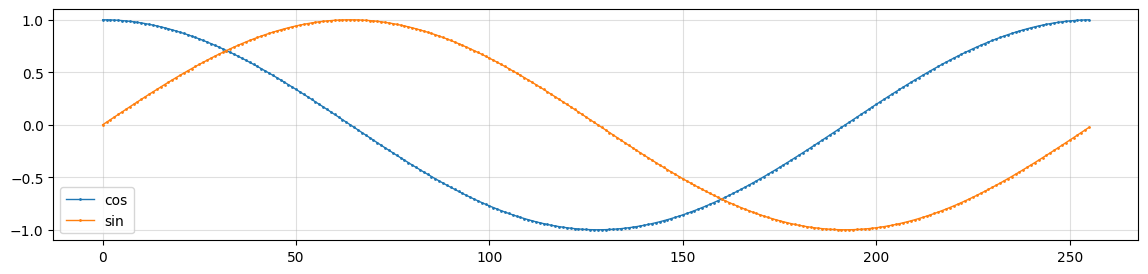

In [28]:
from matplotlib import pyplot as plt

x = np.arange(256, dtype=np.uint8)
scale = 2 * np.pi / 256

x_cos = np.cos(x * scale)
x_sin = np.sin(x * scale)

fig, ax = plt.subplots(figsize=(14, 3))

ax.plot(x, x_cos, '.-', label='cos', linewidth=1, markersize=2)
ax.plot(x, x_sin, '.-', label='sin', linewidth=1, markersize=2)

ax.grid(which='major', alpha=0.4)
ax.legend()

plt.show()

In [29]:
type(ds)

datasets.dataset_dict.DatasetDict

In [31]:
type(ds['train'])

datasets.arrow_dataset.Dataset

In [32]:
type(img)

PIL.PngImagePlugin.PngImageFile

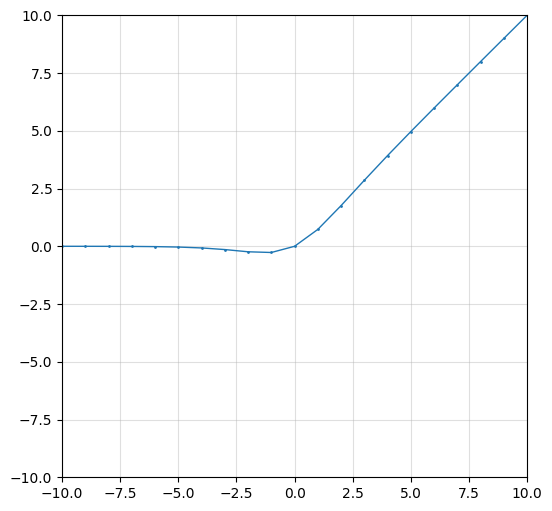

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(-10, 10 + 1)
y = x / (1 + np.exp(-x))

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(x, y, '.-', linewidth=1, markersize=2)
ax.grid(which='major', alpha=0.4)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()